Minst handwritten datasını kullanarak bir adet CNN ağ yapısı geliştiriniz.

Ağ yapısı:
Conv2D(32,(3,3))

relu activation

Conv2D(64,(3,3))

relu activation

Maxpooling ((2,2))

Conv2D(128,(3,3))

relu activation

Conv2D(64,(3,3))

relu activation

Flatten()

Dense 256

dropout 0.25

dense 128

dropout 0.3

dense layer for last (Buradaki bilgileri sizden bekliyorum.)

10 epoch olacak şekilde çalıştırmanızı isitiyorum.

daha sonrasında bathc_size 32 64 128 256 512 1024 olacak şekilde deneyiniz. Accuracy değerlerini ve çalışma süreleriniz karşılaştırnız. Bunu plot olarak çizdiriniz.

---



In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
len(x_train)

60000

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
from keras.utils.data_utils import random
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

for i in range(6):
  rand_num = random.randint(0,len(x_train))
  img = x_train[rand_num]
  cv2_imshow(img)

In [7]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[1]

In [8]:
x_train = x_train.reshape(len(x_train), img_rows, img_cols, 1)
x_test = x_test.reshape(len(x_test), img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [10]:
x_train /= 255
x_test /= 255

In [11]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [13]:
num_class = y_test.shape[1]

In [14]:
num_class

10

In [15]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation = "relu"))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = SGD(0.01), metrics = ["accuracy"])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                        

In [ ]:
batch_size = 32 
epochs = 10
-
  history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

  score = model.evaluate(x_test, y_test)

  print("test loss: ", score[0] )
  print("test loss: ", score[1] )

  batch_size = batch_size*2

Epoch 1/10
1875/1875 [==============================] - 319s 170ms/step - loss: 0.5705 - accuracy: 0.8225 - val_loss: 0.1311 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 319s 170ms/step - loss: 0.1806 - accuracy: 0.9478 - val_loss: 0.0844 - val_accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 322s 172ms/step - loss: 0.1250 - accuracy: 0.9640 - val_loss: 0.0630 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 318s 170ms/step - loss: 0.0947 - accuracy: 0.9729 - val_loss: 0.0566 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 317s 169ms/step - loss: 0.0825 - accuracy: 0.9766 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 317s 169ms/step - loss: 0.0695 - accuracy: 0.9804 - val_loss: 0.0471 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 320s 171ms/step - loss: 0.0615 - accuracy: 0.9821 - val_

In [17]:
batch_size = 32 
epochs = 10

history1 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score1 = model.evaluate(x_test, y_test)

print("test loss: ", score1[0] )
print("test loss: ", score1[1] )

Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.6004 - accuracy: 0.8052 - val_loss: 0.1370 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1769 - accuracy: 0.9484 - val_loss: 0.0778 - val_accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1213 - accuracy: 0.9654 - val_loss: 0.0611 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0971 - accuracy: 0.9725 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0812 - accuracy: 0.9768 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0696 - accuracy: 0.9805 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0617 - accuracy: 0.9822 - val_loss: 0.0428 - val_acc

In [18]:
batch_size = 64 
epochs = 10

history2 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score2 = model.evaluate(x_test, y_test)

print("test loss: ", score2[0] )
print("test loss: ", score2[1] )

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0336 - accuracy: 0.9902 - val_loss: 0.0319 - val_accuracy: 0.9914
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0319 - val_accuracy: 0.9917
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0306 - val_accuracy: 0.9912
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0338 - val_accuracy: 0.9907
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0307 - val_accuracy: 0.9915
Epoch 

In [19]:
batch_size = 128 
epochs = 10

history3 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score3 = model.evaluate(x_test, y_test)

print("test loss: ", score3[0] )
print("test loss: ", score3[1] )

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0327 - val_accuracy: 0.9921
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0310 - val_accuracy: 0.9913
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0327 - val_accuracy: 0.9914
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0326 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0325 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0353 - val_accuracy: 0.9909

In [20]:
batch_size = 256 
epochs = 10

history4 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score4 = model.evaluate(x_test, y_test)

print("test loss: ", score4[0] )
print("test loss: ", score4[1] )

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0357 - val_accuracy: 0.9912
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0348 - val_accuracy: 0.9915
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0350 - val_accuracy: 0.9915
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0356 - val_accuracy: 0.9916
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0355 - val_accuracy: 0.9913
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0360 - val_accuracy: 0.9914
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0350 - val_accuracy: 0.9911

In [21]:
batch_size =  512
epochs = 10

history5 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score5 = model.evaluate(x_test, y_test)

print("test loss: ", score5[0] )
print("test loss: ", score5[1] )

Epoch 1/10
118/118 [==============================] - 5s 35ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0358 - val_accuracy: 0.9916
Epoch 2/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0367 - val_accuracy: 0.9912
Epoch 3/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0356 - val_accuracy: 0.9919
Epoch 4/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0357 - val_accuracy: 0.9916
Epoch 5/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0362 - val_accuracy: 0.9916
Epoch 6/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0354 - val_accuracy: 0.9911
Epoch 7/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0358 - val_accuracy: 0.9916

In [22]:
batch_size =  1024
epochs = 10

history6 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score6 = model.evaluate(x_test, y_test)

print("test loss: ", score6[0] )
print("test loss: ", score6[1] )

Epoch 1/10
59/59 [==============================] - 6s 85ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0364 - val_accuracy: 0.9913
Epoch 2/10
59/59 [==============================] - 4s 66ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0365 - val_accuracy: 0.9912
Epoch 3/10
59/59 [==============================] - 4s 64ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0363 - val_accuracy: 0.9916
Epoch 4/10
59/59 [==============================] - 4s 66ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.0367 - val_accuracy: 0.9911
Epoch 5/10
59/59 [==============================] - 4s 64ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0364 - val_accuracy: 0.9916
Epoch 6/10
59/59 [==============================] - 4s 64ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0363 - val_accuracy: 0.9917
Epoch 7/10
59/59 [==============================] - 4s 65ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0363 - val_accuracy: 0.9915
Epoch 8/10
59

In [23]:
import matplotlib.pyplot as plt

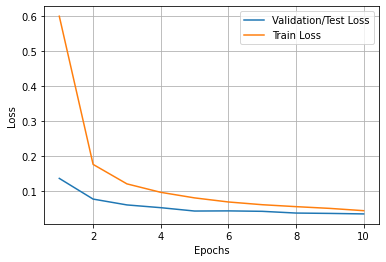

In [50]:
history_dict1 = history1.history
loss_values = history_dict1["loss"]
val_loss_values = history_dict1["val_loss"]
epochs = range(1,len(val_loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

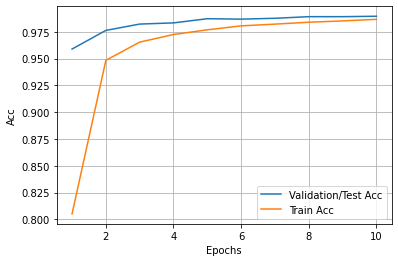

In [51]:
history_dict1 = history1.history
acc_values = history_dict1["accuracy"]
val_acc_values = history_dict1["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()


1024

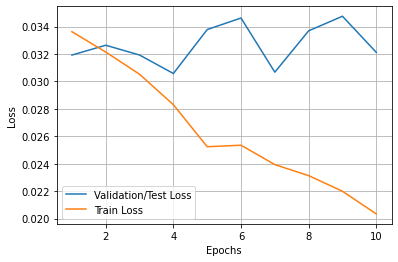

In [40]:
history_dict2 = history2.history
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1,len(val_loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

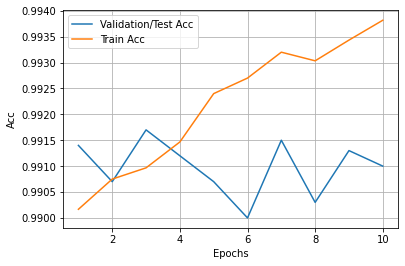

In [41]:
history_dict2 = history2.history
acc_values = history_dict2["accuracy"]
val_acc_values = history_dict2["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()


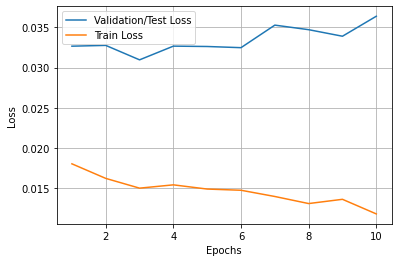

In [42]:
history_dict3 = history3.history
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1,len(val_loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

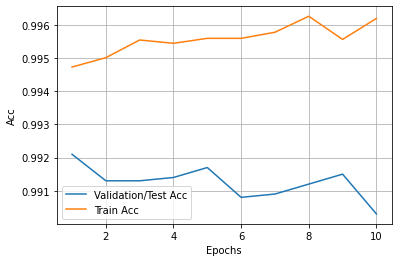

In [43]:
history_dict3 = history3.history
acc_values = history_dict3["accuracy"]
val_acc_values = history_dict3["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()


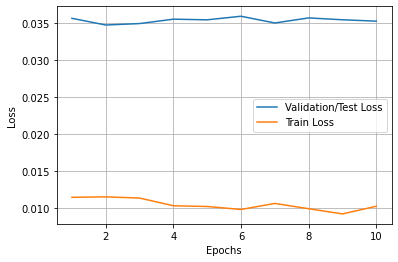

In [44]:
history_dict4 = history4.history
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1,len(val_loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

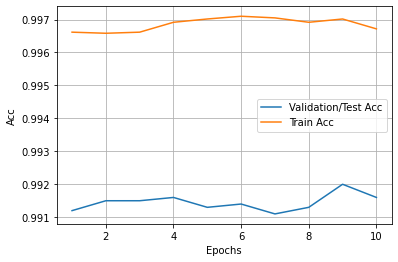

In [45]:
history_dict4 = history4.history
acc_values = history_dict4["accuracy"]
val_acc_values = history_dict4["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()


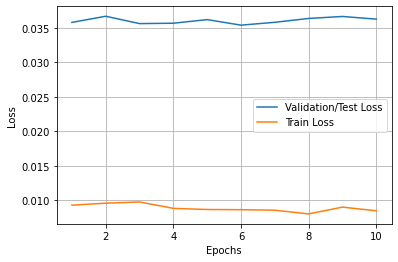

In [46]:
history_dict5 = history5.history
loss_values = history_dict5["loss"]
val_loss_values = history_dict5["val_loss"]
epochs = range(1,len(val_loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

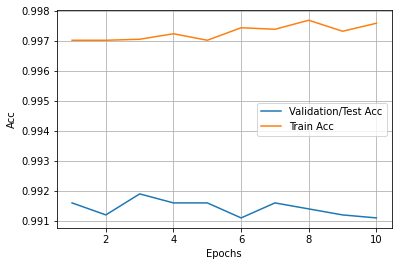

In [47]:
history_dict5 = history5.history
acc_values = history_dict5["accuracy"]
val_acc_values = history_dict5["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()


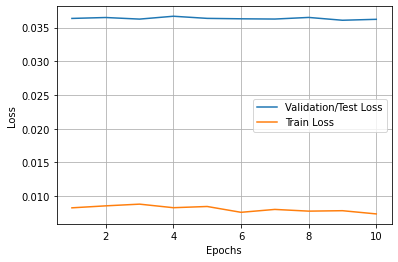

In [48]:
history_dict6 = history6.history
loss_values = history_dict6["loss"]
val_loss_values = history_dict6["val_loss"]
epochs = range(1,len(val_loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

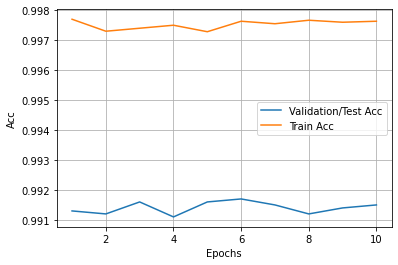

In [49]:
history_dict6 = history6.history
acc_values = history_dict6["accuracy"]
val_acc_values = history_dict6["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()
